<a href="https://colab.research.google.com/github/Asigen93/deteksiayam_yolov8_and_deepsort/blob/main/beta4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# jalankan di Colab cell (prefix !)
!pip install -U pip
!pip install ultralytics roboflow opencv-python-headless matplotlib tqdm pandas
# TensorFlow dibutuhkan untuk export/validasi TFLite
!pip install -U "tensorflow>=2.11.0"
pip install -U yolox-bytetrack
!pip install deep-sort-realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 60.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 148.2 MB/s  0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [ultralytics]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="QIxsCi9aE9bKIfs7vXkg")  # paste API key Anda
# Ganti workspace/project/version sesuai Roboflow Anda:
# Anda bisa dapatkan nama project & versi dari URL Roboflow atau dari dashboard
project = rf.workspace().project("countingayam-om39k-jj99v")  # jika error, lihat catatan di bawah
dataset = project.version(1).download("yolov8")  # pilihan export: "yolov8" atau "yolov5"
print("Dataset downloaded to:", dataset.location)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to countingayam-1 in yolov8:: 100%|██████████| 2726/2726 [00:15<00:00, 178.45it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset downloaded to: /content/countingayam-1


In [3]:
import os
# sesuaikan path kalau Anda pakai dataset.location dari SDK, contohnya:
dataset_path = "/content/countingayam-1"   # ganti sesuai lokasi unzip / dataset.location
# kalau pakai SDK: dataset_path = dataset.location

for root, dirs, files in os.walk(dataset_path):
    print(root, "->", len([f for f in files if f.endswith(('.jpg','.png'))]), "images")
    # break supaya tidak print semua
    break

# Jika Roboflow sudah menyertakan data.yaml, gunakan itu.
!sed -n '1,200p' {dataset_path}/data.yaml

/content/countingayam-1 -> 0 images
names:
- ayam
nc: 1
roboflow:
  license: CC BY 4.0
  project: countingayam-om39k-jj99v
  url: https://universe.roboflow.com/dianrcs/countingayam-om39k-jj99v/dataset/1
  version: 1
  workspace: dianrcs
test: ../test/images
train: ../train/images
val: ../valid/images


In [4]:
print(dataset.location)

/content/countingayam-1


In [5]:
from ultralytics import YOLO

# Load arsitektur YOLOv11 kecil (nano)
model = YOLO("yolov11m.yaml")

# Training dengan dataset ayam
model.train(
    data="countingayam-1/data.yaml",
    epochs=50,
    imgsz=960,          # ukuran input, bisa diubah misalnya 960
    batch=16,           # ukuran batch training
    device=0            # 0 = GPU, 'cpu' jika tanpa GPU
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=countingayam-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b18eae6d070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
# Validasi
results = model.val(data="/content/countingayam-1/data.yaml")
print(results)

# Prediksi contoh gambar di val/images
model.predict(
    source="/content/countingayam-1/valid/images",
    save=True,
    conf=0.25,
    imgsz=960
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2847.6±1449.6 MB/s, size: 2010.2 KB)
val: Scanning /content/countingayam-1/valid/labels.cache... 197 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 197/197 187.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 0.6it/s 20.5s
                   all        197       2442      0.905      0.882      0.928      0.726
Speed: 0.2ms preprocess, 7.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b18e33683e0>
curves: ['Precision-Recall(B)', 'F1-Confide

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ayam'}
 obb: None
 orig_img: array([[[186, 194, 193],
         [190, 198, 197],
         [196, 204, 203],
         ...,
         [239, 232, 229],
         [238, 231, 228],
         [237, 230, 227]],
 
        [[194, 202, 201],
         [195, 203, 202],
         [197, 205, 204],
         ...,
         [237, 230, 227],
         [236, 229, 226],
         [235, 228, 225]],
 
        [[202, 210, 209],
         [200, 208, 207],
         [199, 207, 206],
         ...,
         [233, 226, 223],
         [232, 225, 222],
         [231, 224, 221]],
 
        ...,
 
        [[122, 141, 148],
         [123, 142, 149],
         [126, 145, 152],
         ...,
         [162, 187, 197],
         [163, 188, 198],
         [160, 185, 195]],
 
        [[116, 138, 144],
         [114, 136, 142],
         [113, 135, 141],
         ...,
         [157, 179, 

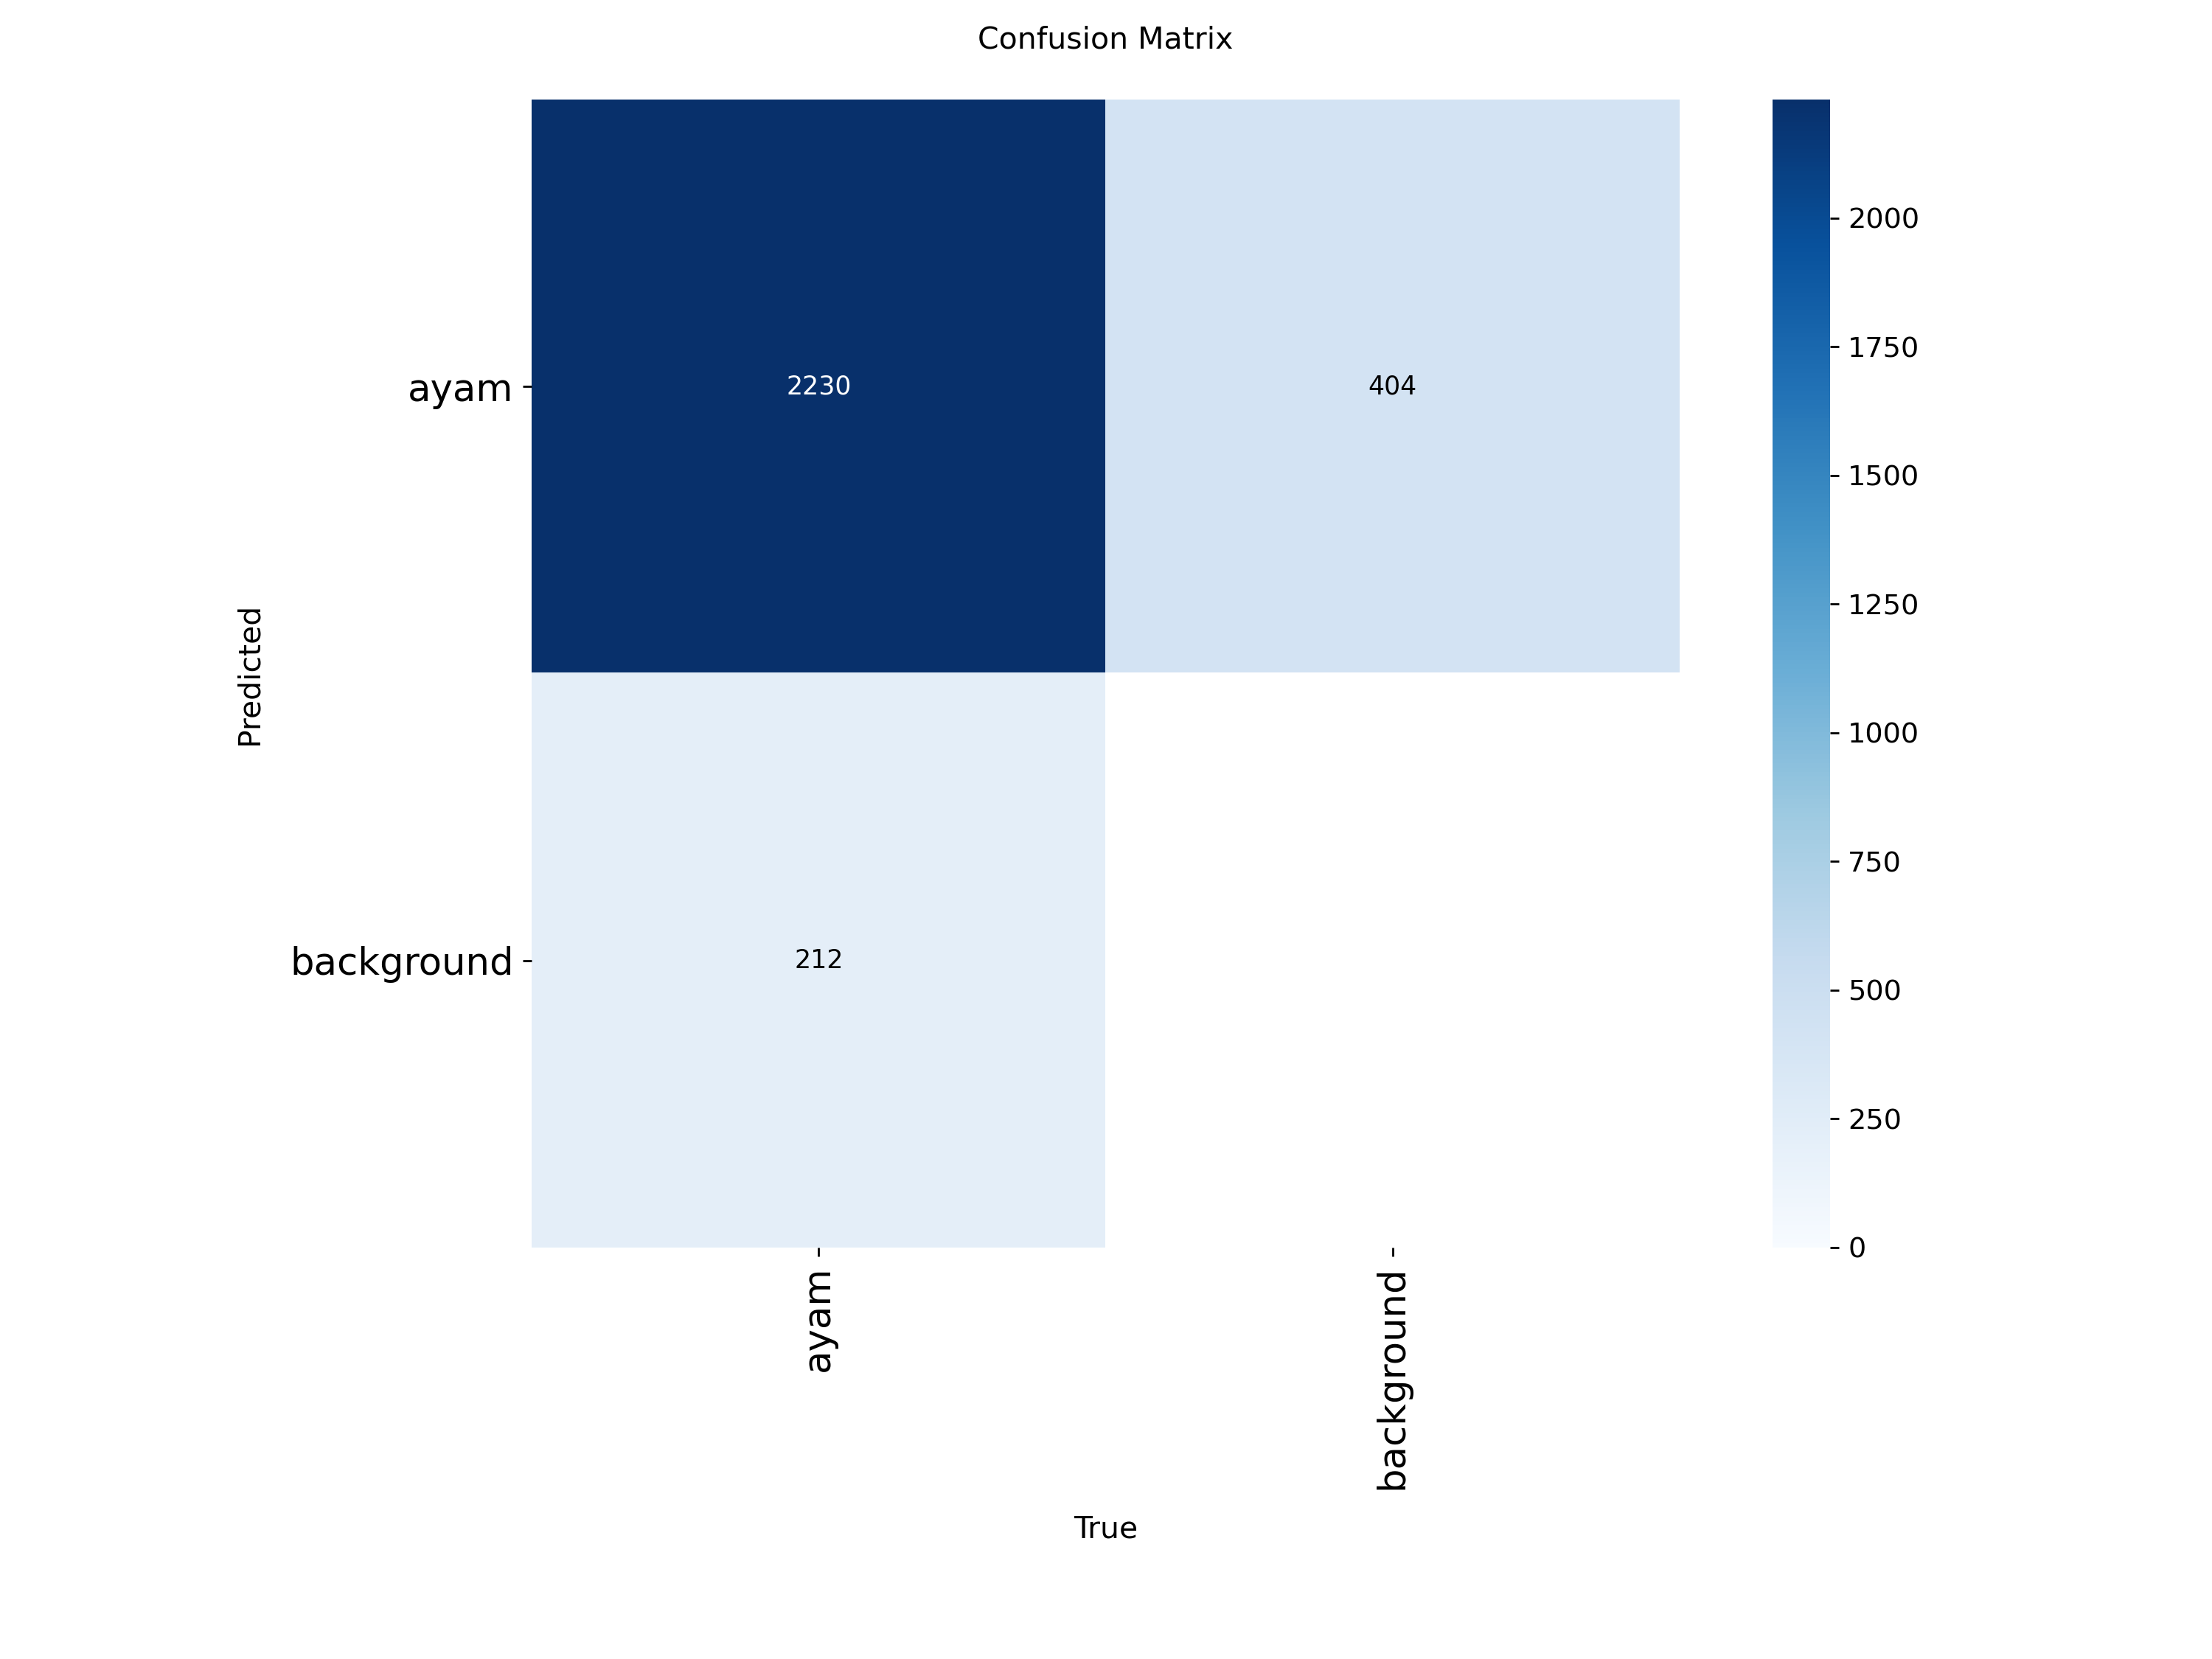

In [7]:
from IPython.display import Image, display

# Tampilkan confusion matrix
display(Image(filename="/content/runs/detect/train/confusion_matrix.png"))

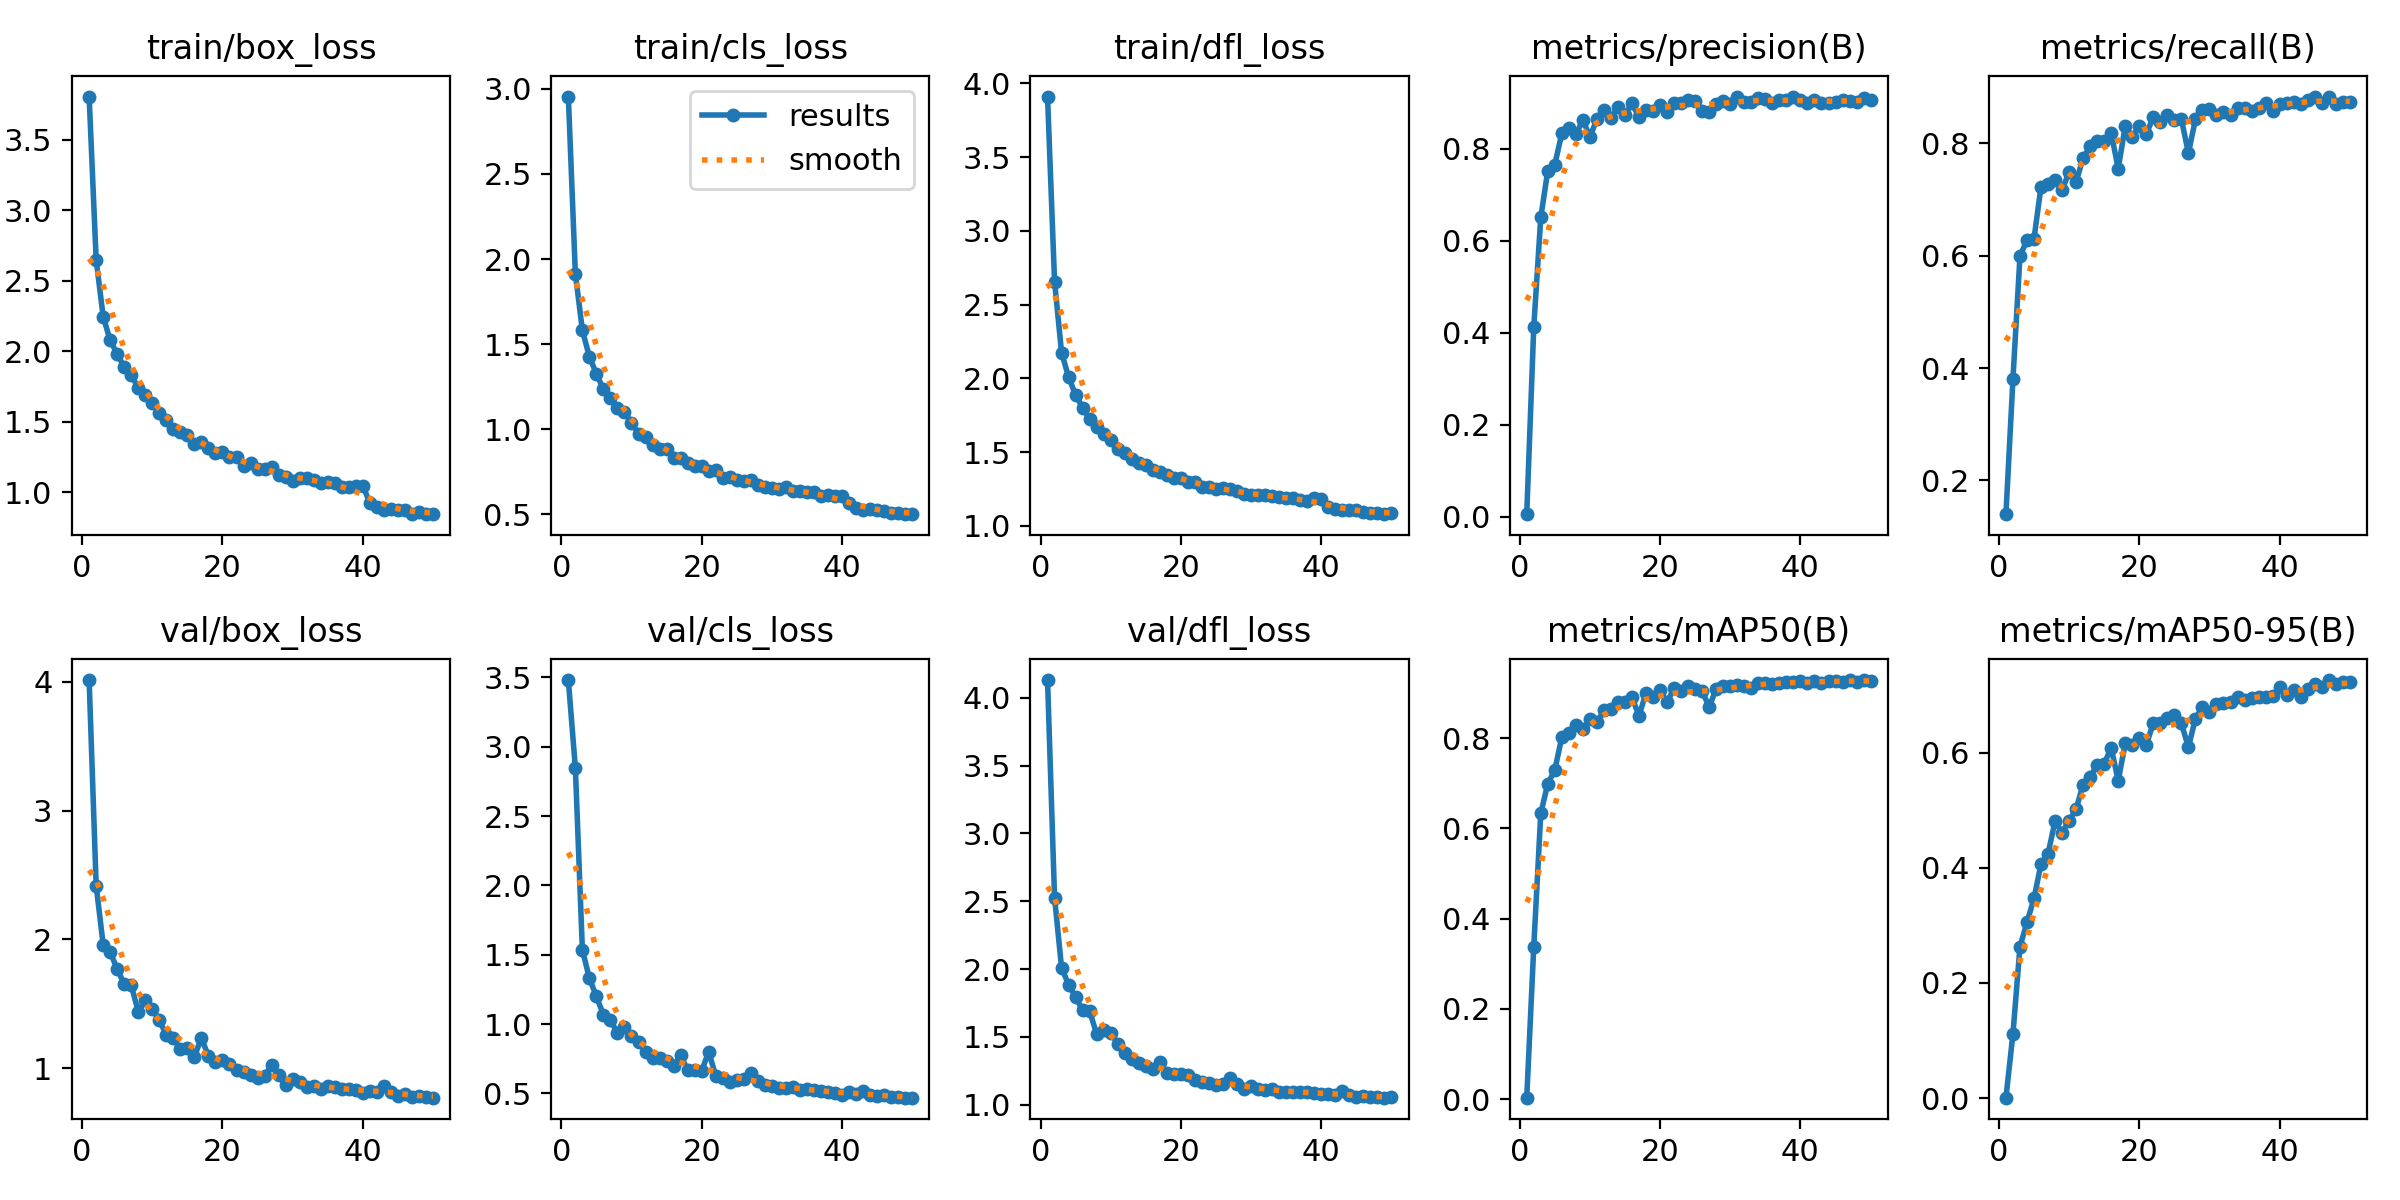

In [8]:
from IPython.display import Image, display

# Tampilkan confusion matrix
display(Image(filename="/content/runs/detect/train/results.png"))

In [10]:
import cv2
import numpy as np
from ultralytics import YOLO
from yolox.tracker.byte_tracker import BYTETracker
from yolox.tracker.byte_tracker import STrack

# --- Konfigurasi ByteTrack ---
class BYTETrackerArgs:
    track_thresh = 0.5       # threshold deteksi minimal
    track_buffer = 30        # berapa lama ID boleh hilang
    match_thresh = 0.8       # ambang kecocokan antar frame
    aspect_ratio_thresh = 3.0
    min_box_area = 10
    mot20 = False

# --- Fungsi counting ayam ---
def infer_and_count_video(video_path, weight_path, labels=['ayam'], out_video='out_count.mp4',
                          conf_thres=0.25, iou_thres=0.45):

    # Load model YOLOv11
    model = YOLO(weight_path)

    # Open video
    cap = cv2.VideoCapture(video_path)
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS) or 25
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(out_video, fourcc, fps, (w,h))

    # Inisialisasi ByteTrack
    tracker = BYTETracker(BYTETrackerArgs(), frame_rate=fps)
    total_count = 0
    counted_ids = set()

    # Garis counting (vertikal di tengah)
    line_x = int(w * 0.5)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Deteksi dengan YOLOv11
        results = model.predict(frame, imgsz=960, conf=conf_thres, iou=iou_thres, verbose=False)[0]

        detections = []
        for r in results.boxes:
            x1,y1,x2,y2 = r.xyxy[0].cpu().numpy()
            conf = float(r.conf.cpu().numpy())
            cls = int(r.cls.cpu().numpy())
            detections.append([x1, y1, x2-x1, y2-y1, conf, cls])  # format xywh

        # Update tracker
        online_targets = tracker.update(np.array(detections), (h, w), (h, w))

        for t in online_targets:
            tlwh = t.tlwh
            x1,y1,x2,y2 = int(tlwh[0]), int(tlwh[1]), int(tlwh[0]+tlwh[2]), int(tlwh[1]+tlwh[3])
            track_id = t.track_id
            cls_id = int(t.class_id) if hasattr(t, "class_id") else 0
            label = labels[cls_id] if cls_id < len(labels) else str(cls_id)

            # Gambar bounding box
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 3)
            cv2.putText(frame, f"{label} ID:{track_id}", (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 3)

            # Ambil centroid
            cx = int((x1+x2)/2)
            cy = int((y1+y2)/2)

            # Cek crossing line (kiri → kanan / kanan → kiri)
            if track_id not in counted_ids:
                if cx >= line_x-5 and cx <= line_x+5:  # buffer 5px
                    counted_ids.add(track_id)
                    total_count += 1

        # Gambar garis & total
        cv2.line(frame, (line_x,0), (line_x,h), (255,0,0), 3)
        cv2.putText(frame, f"Total count: {total_count}", (20,50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,255), 4)

        writer.write(frame)

    cap.release()
    writer.release()
    print("Selesai. Output:", out_video)


# --- Contoh panggil ---
infer_and_count_video(
    video_path='/content/tes1.mp4',
    weight_path='runs/detect/train/weights/best.pt',
    labels=['ayam'],
    out_video='result_count_bytetrack.mp4',
    conf_thres=0.25,
    iou_thres=0.2
)

Selesai. Output: result_count.mp4


In [11]:
from ultralytics import YOLO

# path weight hasil training:
weight_path = "runs/detect/train/weights/best.pt"
model = YOLO(weight_path)

# 1) Export FP16 (smaller, default no int8):
model.export(format="tflite", imgsz=960, optimize=True)
# Hasil: file seperti best-fp16.tflite di working dir

# 2) (Opsional) Export INT8 (post-training quantization)
# Pastikan dataset/data.yaml ada, Ultralytics akan gunakan data untuk calibrasi quantization
try:
    model.export(format="tflite", imgsz=640, int8=True, data='data.yaml', optimize=True)
    print("INT8 export selesai.")
except Exception as e:
    print("INT8 export gagal, cek error:", e)
    print("Gunakan fallback FP16 atau lakukan quantization manual.")

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 65.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.20.0...
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.

ImportError: generic_type: type "InterpreterWrapper" is already registered!

In [ ]:
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="best-fp16.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input:", input_details)
print("Output:", output_details)

# contoh preprocess satu image:
import cv2, numpy as np
img = cv2.imread('/content/some_test_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = input_details[0]['shape'][1], input_details[0]['shape'][2]
img_resized = cv2.resize(img, (w,h))
img_arr = img_resized.astype('float32') / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

interpreter.set_tensor(input_details[0]['index'], img_arr)
interpreter.invoke()
outs = [interpreter.get_tensor(o['index']) for o in output_details]
for o in outs:
    print("out shape:", o.shape)
# inspeksi array untuk tahu format keluaran; parsing custom diperlukan